chapter04 다양한 분류 알고리즘
04-2 확률적 경사 하강법

[확률적 경사 하강법]  

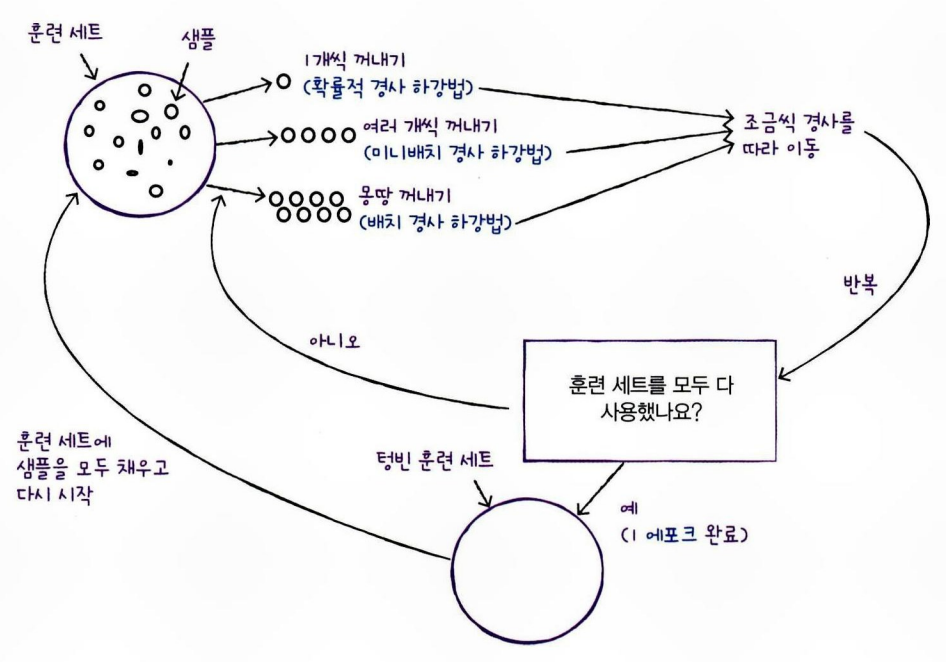

[손실함수(loss function)]  
모델이 얼마나 잘못 예측했는지를 수치로 표현하는 함수
- 예측이 정확할수록 손실이 0에 가까움  
- 예측이 틀릴수록 손실이 커짐  

손실 함수는 미분이 가능해야 한다!  
손실함수의 최솟값을 찾는 방법 = '확률적 경사 하강법'  
비용함수와 같은 의미로 사용됨

로지스틱 회귀는 분류모델이지만 단순히 0이나 1로 예측하지 않고 '1일 확률'을 예측

[로지스틱 손실 함수=이진 크로스엔트로피 손실 함수]    
타깃 = 1일때 > -log(예측 확률)  
타깃 = 0일때 > -log(1-예측 확률)

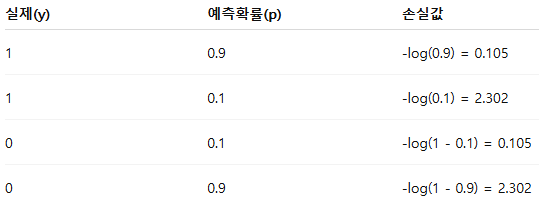

이진 분류에 사용하는 손실함수는 '로지스틱 손실 함수=이진 크로스엔트로피 손실 함수'  
다중 분류에 사용하는 손실 함수는 '크로스엔트로피 손실 함수'

[확률적 경사 하강법을 사용한 분류 모델 만들기]  
SGDClassifier 사용  
: 분류기, 확률적 경사하강법을 이용해 모델을 학습하는 알고리즘

In [17]:
# fish_csv_data 파일에서 판다스 데이터프레임 만들기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data') 

In [18]:
# Species는 타깃데이터, Species 제외한 나머지 5개는 입력 데이터로 사용
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species']

In [19]:
# 훈련세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [20]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
from sklearn.linear_model import SGDClassifier  # SGDClassifier import

loss = 'log_loss'
> 클래스마다 이진 분류 모델을 만듦(도미는 양성 클래스로 두고 나머지를 모두 음성 클래스로 둠) = OvR(One versus Rest)  

max_iter = 10  
> 전체 훈련 세트를 10회 반복

In [22]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[ConvergenceWarning]  
: 모델이 충분히 수렴하지 않았다는 경고  
> max_iter 매개변수의 값을 늘려 주는 것이 좋음

확률적 경사 하강법은 점진적 학습이 가능   
SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가해 훈련이 가능함    
모델을 이어서 훈련할 때는 'partial_fit()' 매서드 사용

In [23]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


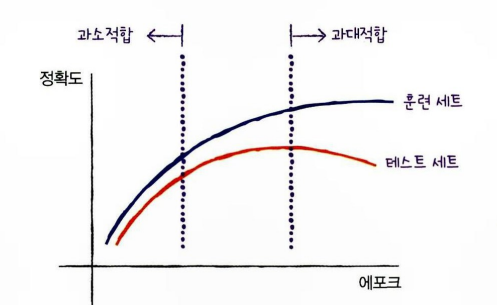

In [24]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # 중복 없는 클래스(라벨) 목록을 구해서, SGCClassifier가 어떤 클래스들을 예측해야 하는지 알려주는 역할

In [25]:
for _ in range(0,300): # '_' 버리는 값 넣어둠(임시 저장 용도로 사용)
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

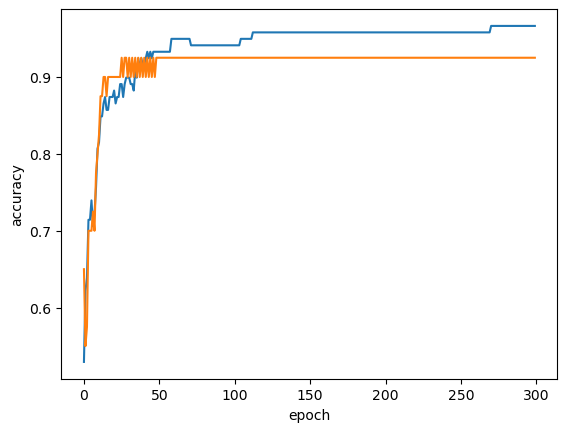

In [26]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
# 반복 횟수 100으로 모델  다시 훈련
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤  
tol 매개변수에서 향상될 최솟값을 지정  
> tol=None으로 지정하면 자동으로 멈추지 않고 무조건 100번 반복

loss 매개변수: 어떤 종류의 손실함수를 사용할지 결정  
> 기본값은 'hinge' = 서포트 벡터 머신 손실함수

In [28]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
